# Name : Isha Singh
# The Sparks Foundation (#GRIPAPR21)
# Task - I Prediction using Supervised ML
**Problem Statement :** 
1. Predict the percentage of the student based on the no. of study hours.
2. What will be the predicted score if a student studies for 9.25 hrs/day?

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('darkgrid')

In [3]:
url = 'http://bit.ly/w-data'

In [4]:
#Reading the data
df = pd.read_csv(url)
print('Data imported successfully')
df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.shape

(25, 2)

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
#Checking for any null values in the dataset
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Data Visualisation

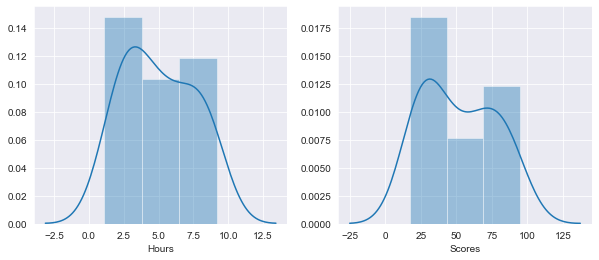

In [8]:
#Univariate Analysis
fig = plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(df['Hours'])
plt.subplot(122)
sns.distplot(df['Scores'])

Text(0.5, 1.0, 'Hours VS Scores')

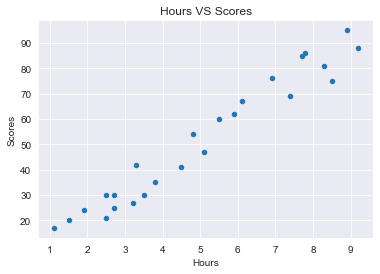

In [9]:
df.plot(x='Hours',y='Scores',kind='scatter',marker='o')
plt.title('Hours VS Scores')

From the above graph, It can clearly be seen that as the number of hours studied increases, the score of the student also increases.
 **Hence, the number of hours studied and the percentage of score are positively correlated.**

# Model Building

The first step is to divide the data into input (X) and output(y).

In [10]:
#Preparing the data
X = df['Hours']
y = df['Scores']

The second step is to split the data into training and test dataset.

In [11]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Now that we have splitted the data into training and test dataset, Let's train our model.

In [12]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train.values.reshape(-1,1),y_train)

print('Training Completed')

Training Completed


# Model Visualization

In [13]:
coeff_df = lreg.coef_
intercept_df = lreg.intercept_
print('Coefficient :',coeff_df)
print('Intercept :',intercept_df)

Coefficient : [10.00178891]
Intercept : 2.2261180679785255


Text(0, 0.5, 'Percentage Scored')

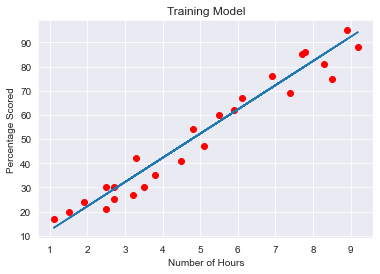

In [14]:
#Plotting the regression line
l = lreg.coef_*X + lreg.intercept_
plt.scatter(X,y,color='red')
plt.plot(X,l)
plt.title('Training Model')
plt.xlabel('Number of Hours')
plt.ylabel('Percentage Scored')

# Making predictions

In [15]:
predictions = lreg.predict(X_test.values.reshape(-1,1))

Let us compare our predicted values with the actual values.

In [16]:
predicted = pd.DataFrame({'Actual':y_test,'Predictions':predictions})
predicted

,Actual,Predictions
0,21,27.230590
6,88,94.242576
18,67,63.237030
19,69,76.239356
22,35,40.232916
5,20,17.228801
1,47,53.235242
16,30,27.230590


**We can infer that the predictions of our model are close to the actual values.**

**What will be the predicted score if a student studies for 9.25 hrs/day?**

In [17]:
hours = 9.25
own_pred = lreg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred))

No of Hours = 9.25
Predicted Score = [94.74266547]


**Hence, the predicted score of a student who studies 9.25 hrs/day is 94.**

Text(0.5, 1.0, 'Predicted Values')

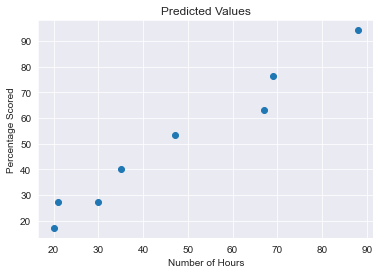

In [18]:
#Plotting the predicted values
plt.scatter(y_test,predictions)
plt.xlabel('Number of Hours')
plt.ylabel('Percentage Scored')
plt.title('Predicted Values')

# Evaluating the Model

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [20]:
print('MEAN ABSOLUTE ERROR:',mean_absolute_error(y_test,predictions))
print('MEAN SQUARED ERROR:',mean_squared_error(y_test,predictions))
print('ROOT MEAN SQUARED ERROR:',np.sqrt(mean_squared_error(y_test,predictions)))

MEAN ABSOLUTE ERROR: 5.06053220035778
MEAN SQUARED ERROR: 28.24613047273271
ROOT MEAN SQUARED ERROR: 5.31470887939619


In [21]:
print("r^2 score:",r2_score(y_test,predictions))

r^2 score: 0.9486769340983194


# Conclusion

1. **The $r^2$ score of the model is 0.9486.**
2. **For a student who studies 9.25 hrs/day, the predicted score is 94.**
3. **As the number of hours of study increases, the score also increases.**